In [2]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [7]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

In [4]:
df = pd.read_json('/Users/Home/Desktop/CMPT 459/MI2/train.json')

In [19]:
# df = df.reset_index(drop=True)
# df.head(1)

In [8]:
train_df = pd.read_json('/Users/Home/Desktop/CMPT 459/MI2/final_train_df.json')

In [101]:
display(train_df.shape)
train_df.head(2)

(48329, 45)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,dt_distance,pet_policy,listing_type,unit_features,building_features,apartment,appliance,bathroom,bedroom,building,contact,floor,high,kitchen,room,mall_distance,created_hour,created_month,created_day,num_photos,description_len,created_dt,managerID_count,buildingID_count,weekends,month_4,month_5,created_nights,created_morning,created_afternoon
0,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,0.0569,2,0,1,0,0.000000,0.0,0.274259,0.108624,0.0,0.146412,0.110607,0.000000,0.09853,0.0,0.04995,5,6,16,12,77,2016-06-16 05:55:27,107,5,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,0.0589,0,0,1,2,0.144399,0.0,0.000000,0.000000,0.0,0.106104,0.000000,0.109239,0.00000,0.0,0.01463,5,6,1,6,131,2016-06-01 05:44:33,26,51,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
train_df['created'] = df['created']
display(train_df.shape)

(48329, 36)

In [24]:
train_df['created_dt'] = pd.to_datetime(train_df['created'])

In [29]:
unique, counts = np.unique(train_df.manager_id, return_counts=True)

manager_id_arr = np.asarray((unique, counts)).T
len(manager_id_arr)

3423

In [30]:
unique, counts = np.unique(train_df.building_id, return_counts=True)

building_id_arr = np.asarray((unique, counts)).T
len(building_id_arr)

7219

In [32]:
manager_id_dict = {}
for val in manager_id_arr:
    manager_id_dict[val[0]] = val[1]

In [33]:
building_id_dict = {}
for val in building_id_arr:
    building_id_dict[val[0]] = val[1]

In [31]:
def add_count(row, id_dict):
    if row in id_dict:
        return id_dict[row]

In [34]:
train_df['managerID_count'] = train_df['manager_id'].apply(lambda row: add_count(row, manager_id_dict))

In [36]:
train_df['buildingID_count'] = train_df['building_id'].apply(lambda row: add_count(row, building_id_dict))

In [112]:
train_df.tail()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,dt_distance,pet_policy,listing_type,unit_features,building_features,apartment,appliance,bathroom,bedroom,building,contact,floor,high,kitchen,room,mall_distance,created_hour,created_month,created_day,num_photos,description_len,created_dt,managerID_count,buildingID_count,weekends,month_4,month_5,created_nights,created_morning,created_afternoon,bed_bath_ratio
48324,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-19 03:31:53,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low,0.1835,0,0,1,1,0.064237,0.079686,0.000000,0.140075,0.070245,0.000000,0.071316,0.0,0.063529,0.0,0.03042,3,4,5,5,131,2016-04-19 03:31:53,10,5,0.0,1.0,0.0,1.0,0.0,0.0,3.0
48325,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-20 02:27:19,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium,0.1418,2,0,0,4,0.105489,0.000000,0.000000,0.115015,0.115356,0.000000,0.000000,0.0,0.104327,0.0,0.02884,2,4,2,5,70,2016-04-20 02:27:19,14,126,0.0,1.0,0.0,1.0,0.0,0.0,2.0
48326,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-02 03:03:42,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium,0.1897,2,0,1,1,0.095302,0.118224,0.262352,0.103909,0.104217,0.000000,0.000000,0.0,0.000000,0.0,0.09354,5,4,26,3,81,2016-04-02 03:03:42,107,6,1.0,1.0,0.0,1.0,0.0,0.0,1.0
48327,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-06 18:15:06,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium,0.0249,0,0,1,0,0.072748,0.000000,0.100132,0.079318,0.000000,0.106911,0.080766,0.0,0.071947,0.0,0.00671,2,4,19,5,118,2016-04-06 18:15:06,33,12,0.0,1.0,0.0,0.0,0.0,0.0,2.0
48328,1.0,3,d89f514c3ed0abaae52cba7017ac0701,2016-04-22 02:55:58,***PRIME MIDTOWN EAST OFF PARK AVE***TRUE 3 BE...,E 54th St,"[Dining Room, Elevator, Laundry in Building, D...",40.7594,6901023,-73.9712,e90f2ded843cdb2efd65ef47d9fc8029,[https://photos.renthop.com/2/6901023_02052d90...,4280,123 E 54th St,high,0.0680,0,0,1,1,0.100297,0.000000,0.138051,0.218708,0.000000,0.000000,0.000000,0.0,0.099192,0.0,0.00845,5,4,20,8,58,2016-04-22 02:55:58,102,50,1.0,1.0,0.0,1.0,0.0,0.0,3.0


In [74]:
train_df['weekends'] = (train_df['created_dt'].dt.weekday > 3).astype(float)
# 1 if its friday/sat/sun
# 0 if its m/t/w/th

In [79]:
train_df['month_4'] = (train_df['created_dt'].dt.month == 4).astype(float)
train_df['month_5'] = (train_df['created_dt'].dt.month == 5).astype(float)

In [90]:
# 0-5, 6-11, 12-17,
# train_df['created_dt'].dt.hour
train_df['created_nights'] = (train_df['created_dt'].dt.hour < 6).astype(float)
train_df['created_morning'] = ((train_df['created_dt'].dt.hour >= 6) & (train_df['created_dt'].dt.hour < 12)).astype(float)
train_df['created_afternoon'] = ((train_df['created_dt'].dt.hour >= 12) & (train_df['created_dt'].dt.hour < 18)).astype(float)


In [100]:
# from sklearn.metrics.pairwise import manhattan_distances
downtown = [40.7209, -74.0007]

def man_distances(row):
    dist = manhattan_distances([[row.latitude, row.longitude]], [downtown])
    return dist[0][0]


train_df['dt_distance'] = train_df.apply(lambda row: man_distances(row), axis=1)
train_df.dt_distance.head()

0    0.0569
1    0.0589
2    0.0748
3    0.0646
4    0.0494
Name: dt_distance, dtype: float64

In [110]:
def calc_bed_bath(row):
    if row.bathrooms != 0:
        ratio = row.bedrooms/row.bathrooms
        return ratio
    else: return 0

train_df['bed_bath_ratio'] = train_df.apply(lambda row: calc_bed_bath(row), axis=1)

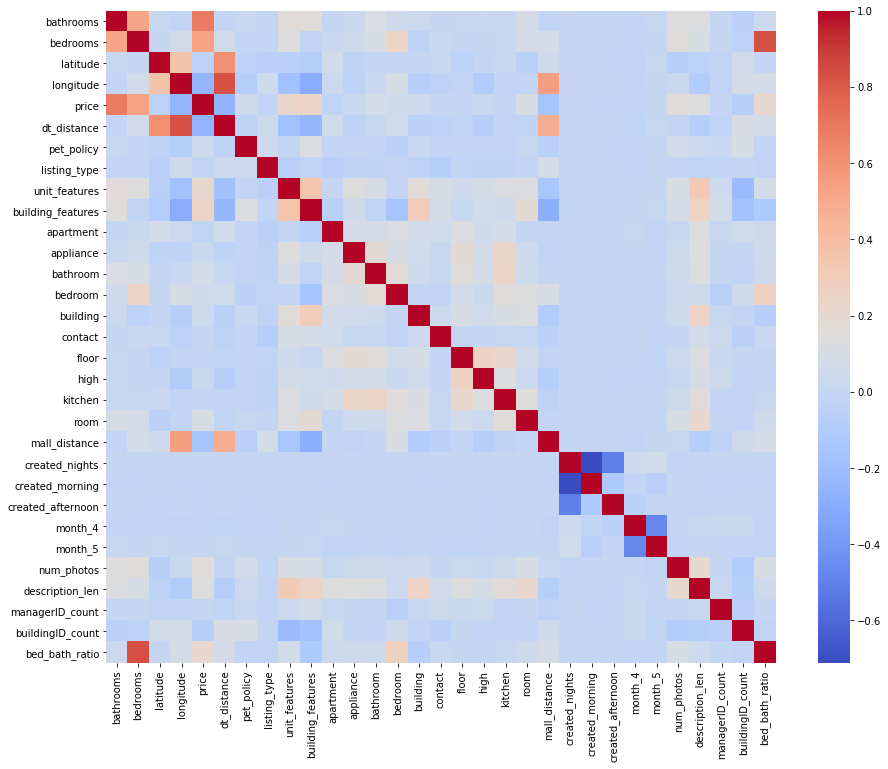

In [113]:
selected_feats_1 = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
                  "dt_distance", "pet_policy", "listing_type", "unit_features", "building_features", "apartment",
                  "appliance", "bathroom", "bedroom", "building", "contact", "floor", "high", "kitchen", "room", 
                  "mall_distance", "created_nights", "created_morning", "created_afternoon", "month_4", 
                    "month_5", "num_photos", "description_len", "managerID_count", "buildingID_count", 'bed_bath_ratio']
heatmap = train_df[selected_feats_1]

plt.figure(figsize=(15,12))
sns.heatmap(heatmap.corr(), cmap='coolwarm');

In [117]:
# train_df.to_json('/Users/Home/Desktop/CMPT 459/MI2/final_train_df_m3.json')
df = pd.read_json('/Users/Home/Desktop/CMPT 459/MI2/test.json')

In [115]:
test_df = pd.read_json('/Users/Home/Desktop/CMPT 459/MI2/final_test.json')

In [140]:
# df = df.reset_index(drop=True)
# test_df.head(2)
display(test_df.shape)
display(train_df.shape)

(74659, 45)

(48329, 46)

In [124]:
test_df['created'] = df['created']

In [126]:
test_df['created_dt'] = pd.to_datetime(test_df['created'])

In [127]:
unique, counts = np.unique(test_df.manager_id, return_counts=True)

test_manager_id_arr = np.asarray((unique, counts)).T
len(test_manager_id_arr)

3851

In [128]:
unique, counts = np.unique(test_df.building_id, return_counts=True)

test_building_id_arr = np.asarray((unique, counts)).T
len(test_building_id_arr)

9321

In [129]:
test_manager_id_dict = {}
for val in test_manager_id_arr:
    test_manager_id_dict[val[0]] = val[1]

In [130]:
test_building_id_dict = {}
for val in test_building_id_arr:
    test_building_id_dict[val[0]] = val[1]

In [131]:
test_df['managerID_count'] = test_df['manager_id'].apply(lambda row: add_count(row, test_manager_id_dict))

In [132]:
test_df['buildingID_count'] = test_df['building_id'].apply(lambda row: add_count(row, test_building_id_dict))

In [135]:
test_df['weekends'] = (test_df['created_dt'].dt.weekday > 3).astype(float)
# 1 if its friday/sat/sun
# 0 if its m/t/w/th

In [136]:
test_df['month_4'] = (test_df['created_dt'].dt.month == 4).astype(float)
test_df['month_5'] = (test_df['created_dt'].dt.month == 5).astype(float)

In [137]:
# 0-5, 6-11, 12-17,
# train_df['created_dt'].dt.hour
test_df['created_nights'] = (test_df['created_dt'].dt.hour < 6).astype(float)
test_df['created_morning'] = ((test_df['created_dt'].dt.hour >= 6) & (test_df['created_dt'].dt.hour < 12)).astype(float)
test_df['created_afternoon'] = ((test_df['created_dt'].dt.hour >= 12) & (test_df['created_dt'].dt.hour < 18)).astype(float)


In [138]:
test_df['bed_bath_ratio'] = test_df.apply(lambda row: calc_bed_bath(row), axis=1)

In [141]:
test_df.to_json('/Users/Home/Desktop/CMPT 459/MI2/final_test_df_m3.json')